In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
ROUI1_대여=pd.read_csv("공공자전거 대여소별 이용정보_201912_202005(대여).csv",encoding='utf-8')
ROUI2_대여=pd.read_csv("공공자전거 대여소별 이용정보_202006(대여).csv",encoding='utf-8')
ROUI3_대여=pd.read_csv("공공자전거 대여소별 이용정보_2020.07_2021.01(대여).csv",encoding='utf-8')
ROUI1_반납=pd.read_csv("공공자전거 대여소별 이용정보_201912_202005(반납).csv",encoding='utf-8')
ROUI2_반납=pd.read_csv("공공자전거 대여소별 이용정보_202006(반납).csv",encoding='utf-8')

# 1) 메타 데이터 확인

## 1-1) 데이터 크기 

In [5]:
ROUI1_대여.shape,ROUI2_대여.shape,ROUI3_대여.shape,ROUI1_반납.shape,ROUI2_반납.shape

((10003, 4), (2062, 4), (14754, 4), (10003, 4), (2062, 4))

## 1-2) 누락값 분포

In [6]:
ROUI1_대여.isnull().sum(),ROUI2_대여.isnull().sum(),ROUI3_대여.isnull().sum(),ROUI1_반납.isnull().sum(),ROUI2_반납.isnull().sum(),

(대여소 그룹       0
 대여소 명        0
 대여 일자 / 월    0
 대여 건수        0
 dtype: int64,
 대여소 그룹       0
 대여소 명        0
 대여 일자 / 월    0
 대여 건수        0
 dtype: int64,
 대여소 그룹       0
 대여소 명        0
 대여 일자 / 월    0
 대여 건수        0
 dtype: int64,
 대여소 그룹       0
 대여소 명        0
 반납 일자 / 월    0
 반납 건수        0
 dtype: int64,
 대여소 그룹       0
 대여소 명        0
 반납 일자 / 월    0
 반납 건수        0
 dtype: int64)

## 1-3) 컬럼 의미 파악

In [7]:
ROUI1_대여.head()

,대여소 그룹,대여소 명,대여 일자 / 월,대여 건수
0,강남구,2301. 현대고등학교 건너편,201912,501
1,강남구,2302. 교보타워 버스정류장(신논현역 3번출구 후면),201912,737
2,강남구,2303. 논현역 7번출구,201912,460
3,강남구,2304. 신영 ROYAL PALACE 앞,201912,150
4,강남구,2305. MCM 본사 직영점 앞,201912,257


In [8]:
ROUI2_대여.head()

,대여소 그룹,대여소 명,대여 일자 / 월,대여 건수
0,강남구,2301. 현대고등학교 건너편,202006,4512
1,강남구,2302. 교보타워 버스정류장(신논현역 3번출구 후면),202006,1650
2,강남구,2303. 논현역 7번출구,202006,1134
3,강남구,2304. 신영 ROYAL PALACE 앞,202006,399
4,강남구,2305. MCM 본사 직영점 앞,202006,490


In [9]:
ROUI3_대여.head()

,대여소 그룹,대여소 명,대여 일자 / 월,대여 건수
0,강남구,2301. 현대고등학교 건너편,202007,3997
1,강남구,2302. 교보타워 버스정류장(신논현역 3번출구 후면),202007,1250
2,강남구,2303. 논현역 7번출구,202007,863
3,강남구,2304. 신영 ROYAL PALACE 앞,202007,334
4,강남구,2305. MCM 본사 직영점 앞,202007,436


In [10]:
ROUI1_반납.head()

,대여소 그룹,대여소 명,반납 일자 / 월,반납 건수
0,강남구,2301. 현대고등학교 건너편,201912,662
1,강남구,2302. 교보타워 버스정류장(신논현역 3번출구 후면),201912,736
2,강남구,2303. 논현역 7번출구,201912,438
3,강남구,2304. 신영 ROYAL PALACE 앞,201912,62
4,강남구,2305. MCM 본사 직영점 앞,201912,342


In [11]:
ROUI2_반납.head()

,대여소 그룹,대여소 명,반납 일자 / 월,반납 건수
0,강남구,2301. 현대고등학교 건너편,202006,4714
1,강남구,2302. 교보타워 버스정류장(신논현역 3번출구 후면),202006,1628
2,강남구,2303. 논현역 7번출구,202006,1072
3,강남구,2304. 신영 ROYAL PALACE 앞,202006,130
4,강남구,2305. MCM 본사 직영점 앞,202006,475


In [12]:
#대여정보만
ROUI_대여=pd.concat([ROUI1_대여,ROUI2_대여,ROUI3_대여],ignore_index=True)
ROUI_대여

,대여소 그룹,대여소 명,대여 일자 / 월,대여 건수
0,강남구,2301. 현대고등학교 건너편,201912,501
1,강남구,2302. 교보타워 버스정류장(신논현역 3번출구 후면),201912,737
2,강남구,2303. 논현역 7번출구,201912,460
3,강남구,2304. 신영 ROYAL PALACE 앞,201912,150
4,강남구,2305. MCM 본사 직영점 앞,201912,257
...,...,...,...,...
26814,중랑구,1474.서울중랑우체국,202101,315
26815,중랑구,1477.면목삼익아파트 앞,202101,159
26816,중랑구,1478.홈플러스 상봉점 앞,202101,427
26817,중랑구,1479.면목 홈플러스 2,202101,187


In [13]:
#2020년만
ROUI_대여2020=ROUI_대여[(ROUI_대여['대여 일자 / 월'] != 201912) &(ROUI_대여['대여 일자 / 월'] != 202101)]
ROUI_대여2020.tail()

,대여소 그룹,대여소 명,대여 일자 / 월,대여 건수
24624,중랑구,1474.서울중랑우체국,202012,430
24625,중랑구,1477.면목삼익아파트 앞,202012,173
24626,중랑구,1478.홈플러스 상봉점 앞,202012,658
24627,중랑구,1479.면목 홈플러스 2,202012,328
24628,중랑구,1480. 용마지구대 옆,202012,348


In [14]:
ROUI_대여2020['대여 일자 / 월']=ROUI_대여2020['대여 일자 / 월'].astype(str)

<ipython-input-14-6704e29afde6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ROUI_대여2020['대여 일자 / 월']=ROUI_대여2020['대여 일자 / 월'].astype(str)


In [15]:
ROUI_대여2020['월']=ROUI_대여2020['대여 일자 / 월'].str[4:]

<ipython-input-15-32eb163d6324>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ROUI_대여2020['월']=ROUI_대여2020['대여 일자 / 월'].str[4:]


In [44]:
ROUI_대여2020

,대여소 그룹,대여소 명,대여 일자 / 월,대여 건수,월
1544,그룹명 없음,대여소명 없음,202001,0,01
1545,강남구,2301. 현대고등학교 건너편,202001,577,01
1546,강남구,2302. 교보타워 버스정류장(신논현역 3번출구 후면),202001,690,01
1547,강남구,2303. 논현역 7번출구,202001,297,01
1548,강남구,2304. 신영 ROYAL PALACE 앞,202001,136,01
...,...,...,...,...,...
24624,중랑구,1474.서울중랑우체국,202012,430,12
24625,중랑구,1477.면목삼익아파트 앞,202012,173,12
24626,중랑구,1478.홈플러스 상봉점 앞,202012,658,12
24627,중랑구,1479.면목 홈플러스 2,202012,328,12


In [48]:
ROUI_대여2020.groupby(['대여소 그룹','대여소 명'])[['대여 건수']].agg(sum)

대여 건수
대여소 그룹 대여소 명                                
강남구    2301. 현대고등학교 건너편                37059
       2302. 교보타워 버스정류장(신논현역 3번출구 후면)  13323
       2303. 논현역 7번출구                   8812
       2304. 신영 ROYAL PALACE 앞          3244
       2305. MCM 본사 직영점 앞               4292
...                                      ...
중랑구    1476.중목초등학교 앞 육교                    2
       1477.면목삼익아파트 앞                   1610
       1478.홈플러스 상봉점 앞                  6827
       1479.면목 홈플러스 2                   3395
       1480. 용마지구대 옆                    4163

[2230 rows x 1 columns]

In [97]:
gu_ROUI_대여_sum=ROUI_대여2020.groupby(['대여소 그룹'])[['대여 건수']].agg(sum).drop(['그룹명 없음','정비센터'])
gu_ROUI_대여_sum.sort_values(by=['대여 건수'],ascending=False)

,대여 건수
대여소 그룹,
강서구,1992286
영등포구,1962498
송파구,1775710
마포구,1507077
노원구,1293400
광진구,1199769
성동구,1055862
양천구,1043802
구로구,941485


In [100]:
gu_ROUI_대여_mean=ROUI_대여2020.groupby(['대여소 그룹'])[['대여 건수']].mean().drop(['그룹명 없음','정비센터'])
gu_ROUI_대여_mean.sort_values(by=['대여 건수'],ascending=False)

,대여 건수
대여소 그룹,
영등포구,1599.427873
강서구,1481.253532
광진구,1424.903800
마포구,1355.285072
노원구,1319.795918
양천구,1205.314088
성동구,1201.208191
송파구,1194.959623
관악구,1131.433333


In [89]:
import folium
map_=folium.Map(location=[45.5236,-122.6750])
geo_path='02.%20skorea_municipalities_geo_simple.json'
geo_str=json.load(open(geo_path,encoding='utf-8'))

In [90]:
map=folium.Map(location=[37.5502,126.982], zoom_start=11,
              titles='구별 대여건수')
map.choropleth(geo_data=geo_str,
              data=gu_ROUI_대여_sum['대여 건수'],
              columns=[gu_ROUI_대여_sum.index,gu_ROUI_대여_sum['대여 건수']],
              fill_color='PuRd',
              key_on='feature.id',
              labels=True)

map

C:\ProgramData\Anaconda3\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [91]:
map=folium.Map(location=[37.5502,126.982], zoom_start=11,
              titles='구별 대여건수')
map.choropleth(geo_data=geo_str,
              data=gu_ROUI_대여_mean['대여 건수'],
              columns=[gu_ROUI_대여_mean.index,gu_ROUI_대여_mean['대여 건수']],
              fill_color='PuRd',
              key_on='feature.id',
              labels=True)

map

C:\ProgramData\Anaconda3\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


<AxesSubplot:xlabel='대여소 그룹'>

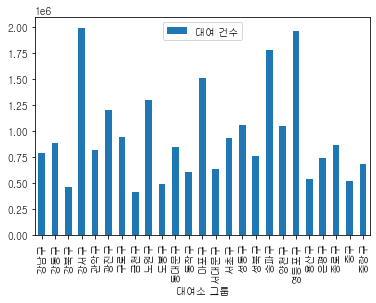

In [65]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

gu_ROUI_대여.plot(kind='bar')

In [17]:
ROUI_대여2020.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23085 entries, 1544 to 24628
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   대여소 그룹     23085 non-null  object
 1   대여소 명      23085 non-null  object
 2   대여 일자 / 월  23085 non-null  object
 3   대여 건수      23085 non-null  int64 
 4   월          23085 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.1+ MB


In [18]:
#피벗테이블로 변화

In [59]:
pv_ROUI_대여= pd.pivot_table(ROUI_대여2020, index=['대여소 그룹','대여소 명'], columns='월', values='대여 건수', aggfunc='sum', fill_value=0)
pv_ROUI_대여

월                                       01   02    03    04    05    06    07  \
대여소 그룹 대여소 명                                                                    
강남구    2301. 현대고등학교 건너편                577  740  3518  4754  5916  4512  3997   
       2302. 교보타워 버스정류장(신논현역 3번출구 후면)  690  620  1210  1723  1704  1650  1250   
       2303. 논현역 7번출구                  297   95   621   930   994  1134   863   
       2304. 신영 ROYAL PALACE 앞         136  105   188   368   292   399   334   
       2305. MCM 본사 직영점 앞              212  196   364   528   466   490   436   
...                                    ...  ...   ...   ...   ...   ...   ...   
중랑구    1476.중목초등학교 앞 육교                  0    0     0     2     0     0     0   
       1477.면목삼익아파트 앞                    0    0     0     1     0    85   219   
       1478.홈플러스 상봉점 앞                   0    0     0     1     0   322  1079   
       1479.면목 홈플러스 2                    0    0     0     1     0   150   418   
       1480. 용마지구대 옆                     0    0     0     1     0   235   592   

월                                        08    09    10    11   12  
대여소 그룹 대여소 명                                                        
강남구    2301. 현대고등학교 건너편                1600  4920  4181  1551  793  
       2302. 교보타워 버스정류장(신논현역 3번출구 후면)   794  1081  1234   892  475  
       2303. 논현역 7번출구                   606   920  1054   845  453  
       2304. 신영 ROYAL PALACE 앞          228   324   307   330  233  
       2305. MCM 본사 직영점 앞               269   376   433   351  171  
...                                     ...   ...   ...   ...  ...  
중랑구    1476.중목초등학교 앞 육교                   0     0     0     0    0  
       1477.면목삼익아파트 앞                   151   367   344   270  173  
       1478.홈플러스 상봉점 앞                  786  1429  1407  1145  658  
       1479.면목 홈플러스 2                   373   773   828   524  328  
       1480. 용마지구대 옆                    436  1110   957   484  348  

[2230 rows x 12 columns]

In [20]:
pv_ROUI_대여.columns

Index(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12',
       'All'],
      dtype='object', name='월')

In [21]:
pv_ROUI_대여.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2231 entries, ('강남구', '2301. 현대고등학교 건너편') to ('All', '')
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   01      2231 non-null   int64
 1   02      2231 non-null   int64
 2   03      2231 non-null   int64
 3   04      2231 non-null   int64
 4   05      2231 non-null   int64
 5   06      2231 non-null   int64
 6   07      2231 non-null   int64
 7   08      2231 non-null   int64
 8   09      2231 non-null   int64
 9   10      2231 non-null   int64
 10  11      2231 non-null   int64
 11  12      2231 non-null   int64
 12  All     2231 non-null   int64
dtypes: int64(13)
memory usage: 316.5+ KB


In [22]:
#NaN값 => 0으로 대체 (아직 안생긴 곳)

In [23]:
pv_ROUI_대여['01']=pv_ROUI_대여['01'].astype(int)
pv_ROUI_대여['02']=pv_ROUI_대여['01'].astype(int)
pv_ROUI_대여['03']=pv_ROUI_대여['01'].astype(int)
pv_ROUI_대여['04']=pv_ROUI_대여['01'].astype(int)
pv_ROUI_대여['05']=pv_ROUI_대여['01'].astype(int)
pv_ROUI_대여['06']=pv_ROUI_대여['01'].astype(int)
pv_ROUI_대여['07']=pv_ROUI_대여['01'].astype(int)
pv_ROUI_대여['08']=pv_ROUI_대여['01'].astype(int)
pv_ROUI_대여['09']=pv_ROUI_대여['01'].astype(int)
pv_ROUI_대여['10']=pv_ROUI_대여['01'].astype(int)
pv_ROUI_대여['11']=pv_ROUI_대여['01'].astype(int)
pv_ROUI_대여['12']=pv_ROUI_대여['01'].astype(int)

# 3) 관심 항목 탐색(시각화와 함께)

## 3-1) 수치형 데이터 탐색

In [54]:
pv_ROUI_대여.describe().T  

,count,mean,std,min,25%,50%,75%,max
월,,,,,,,,
01,2231.0,711.920215,16810.162372,0.0,0.0,273.0,554.0,794147.0
02,2231.0,687.825190,16241.351558,0.0,0.0,268.0,534.0,767269.0
03,2231.0,1375.089198,32473.524649,0.0,1.0,474.0,1010.0,1533912.0
04,2231.0,1934.014343,45671.567020,0.0,2.0,666.0,1406.0,2157393.0
05,2231.0,2223.513223,52508.660154,0.0,49.0,732.0,1593.5,2480329.0
06,2231.0,2483.950695,58652.006631,0.0,307.5,914.0,1736.0,2770847.0
07,2231.0,2315.351860,54669.175521,0.0,391.5,878.0,1569.5,2582775.0
08,2231.0,1554.960108,36713.491761,0.0,280.0,620.0,1083.5,1734558.0
09,2231.0,2520.582698,59515.259222,0.0,441.0,952.0,1668.5,2811710.0


In [58]:
#월별 최대 사용량
pv_ROUI_대여.max()

월
01       794147
02       767269
03      1533912
04      2157393
05      2480329
06      2770847
07      2582775
08      1734558
09      2811710
10      2891772
11      1990615
12      1196965
All    23712292
dtype: int64

In [102]:
대여소별_ROUI_대여_sum=ROUI_대여2020.groupby(['대여소 명'])[['대여 건수']].agg(sum)
대여소별_ROUI_대여_sum.sort_values(by=['대여 건수'],ascending=False)

,대여 건수
대여소 명,
502. 뚝섬유원지역 1번출구 앞,139293
207. 여의나루역 1번출구 앞,131270
2102. 봉림교 교통섬,87806
152. 마포구민체육센터 앞,87298
"2219. 고속터미널역 8-1번, 8-2번 출구 사이",68422
...,...
2726.서울식물원 주제원입구,1
2803.항동지구 6단지 602동 건너편,1
862.원효아파트,1
